PUNTO 1:

Las personas desocupadas se identifican como personas que no están ocupadas actualmente pero que buscan un empleo 
de manera activa. 

Fuente: https://www.indec.gob.ar/uploads/informesdeprensa/mercado_trabajo_eph_4trim24083C6B9E41.pdf Página 6. 

PUNTO 2:

Punto a)

Elegimos trabajar con los datos de Gran Buenos Aires.
En las siguientes celdas eliminamos los datos que no corresponden a la región elegida y unificamos ambas bases.

In [235]:
# Importamos las librerías necesarias
import pandas as pd

# Cargamos la base de datos del primer trimestre de 2004 en formato Stata
t2004 = pd.read_stata('C:/Users/User/Downloads/Individual_t104.dta')

# Cargamos la base de datos del primer trimestre de 2024 en formato Excel
t2024 = pd.read_excel('C:/Users/User/Downloads/usu_individual_T124.xlsx')

# Unificamos las bases (agregamos una columna de año para distinguir)
t2004['ANO_EPH'] = 2004  # Añadimos año como variable
t2024['ANO_EPH'] = 2024  # Añadimos año como variable

# Filtramos la base unificada para quedarnos solo con los registros de la región "Gran Buenos Aires"
# Según los diccionarios, el código correspondiente a Gran Buenos Aires es REGION == 1 o REGION == 01
df_gba = df_unificada[df_unificada['REGION'] == 1]

In [237]:
# Obtenemos los nombres de columnas de cada base
t2004.columns = t2004.columns.str.upper()
t2024.columns = t2024.columns.str.upper()

# Filtramos por Gran Buenos Aires (REGIÓN == 1)
t2004 = t2004[t2004['REGION'] == 1]
t2024 = t2024[t2024['REGION'] == 1]

# Obtenemos nuevamente los nombres de columnas después de armonizar
columnas_2004 = set(t2004.columns)
columnas_2024 = set(t2024.columns)

# Identificamos columnas comunes
columnas_comunes = columnas_2004.intersection(columnas_2024)

# Recortamos las bases a las columnas comunes
t2004_recortada = t2004[list(columnas_comunes)].copy()
t2024_recortada = t2024[list(columnas_comunes)].copy()

# Añadimos el año de relevamiento
t2004_recortada['ANO_EPH'] = 2004
t2024_recortada['ANO_EPH'] = 2024

# Eliminamos columnas completamente vacías
t2004_recortada = t2004_recortada.dropna(axis=1, how='all')
t2024_recortada = t2024_recortada.dropna(axis=1, how='all')

# Concatenamos las dos bases en una sola
df_unificada = pd.concat([t2004_recortada, t2024_recortada], ignore_index=True)

Punto b)

La variables elegidas son las siguientes:
sexo, edad, estado_civil, cobertura_medica, sabe_leer_escribir,
asistencia_escolar, nivel_educativo, finalizo_nivel, condicion_actividad,
categoria_ocupacional, horas_ocupacion_principal, quiere_mas_horas,
busco_mas_horas, intensidad_ocupacional, ponderador

(Renombramos las variables para facilitar la lectura y comprensión de los datos a trabajar.

Las que más valores faltantes tienen dentro de las 15 variables que elegimos son:
- horas_ocupacion_principal
- quiere_mas_horas
- busco_mas_horas
- intensidad_ocupacional
Todas con una cantidad de 3827 datos y correspondientes a la base del primer trimestre de 2024.

La base de datos correspondiente al primer trimestre del 2004 no contiende datos faltantes en las variables seleccionadas.

In [239]:
# Lista de variables seleccionadas
variables = [
    'CH04', 'CH06', 'CH07', 'CH08', 'CH09',
    'CH10', 'CH12', 'CH13', 'ESTADO', 'CAT_OCUP',
    'PP3E_TOT', 'PP03G', 'PP03I', 'INTENSI', 'PONDERA'
]

# Renombramiento de variables seleccionadas
renombrar_vars = {
    'CH04': 'sexo',
    'CH06': 'edad',
    'CH07': 'estado_civil',
    'CH08': 'cobertura_medica',
    'CH09': 'sabe_leer_escribir',
    'CH10': 'asistencia_escolar',
    'CH12': 'nivel_educativo',
    'CH13': 'finalizo_nivel',
    'ESTADO': 'condicion_actividad',
    'CAT_OCUP': 'categoria_ocupacional',
    'PP3E_TOT': 'horas_ocupacion_principal',
    'PP03G': 'quiere_mas_horas',
    'PP03I': 'busco_mas_horas',
    'INTENSI': 'intensidad_ocupacional',
    'PONDERA': 'ponderador'
}

# Llamamos a las variables que fueron renombradas
variables = [
    'sexo', 'edad', 'estado_civil', 'cobertura_medica', 'sabe_leer_escribir',
    'asistencia_escolar', 'nivel_educativo', 'finalizo_nivel', 'condicion_actividad',
    'categoria_ocupacional', 'horas_ocupacion_principal', 'quiere_mas_horas',
    'busco_mas_horas', 'intensidad_ocupacional', 'ponderador'
]

# Creamos una copia explícita del DataFrame filtrado antes de renombrar
df_gba = df_gba.copy()

# Renombramos columnas con seguridad
df_gba.rename(columns=renombrar_vars, inplace=True)

# Los dos pasos anteriores garantizan el buen funcionamiento de los Pandas.

# Creamos tablas de valores faltantes por año
faltantes_2004 = df_gba[df_gba['ANO_EPH'] == 2004][variables].isna().sum()
faltantes_2024 = df_gba[df_gba['ANO_EPH'] == 2024][variables].isna().sum()

# Mostramos los resultados como DataFrames ordenados
tabla_2004 = pd.DataFrame({'Variable': faltantes_2004.index, 'Faltantes_2004': faltantes_2004.values})
tabla_2024 = pd.DataFrame({'Variable': faltantes_2024.index, 'Faltantes_2024': faltantes_2024.values})

# Mostramos las tablas
print("# Tabla de faltantes - Año 2004:")
print(tabla_2004.sort_values(by='Faltantes_2004', ascending=False))

print("\n# Tabla de faltantes - Año 2024:")
print(tabla_2024.sort_values(by='Faltantes_2024', ascending=False))

# Tabla de faltantes - Año 2004:
                     Variable  Faltantes_2004
0                        sexo               0
1                        edad               0
2                estado_civil               0
3            cobertura_medica               0
4          sabe_leer_escribir               0
5          asistencia_escolar               0
6             nivel_educativo               0
7              finalizo_nivel               0
8         condicion_actividad               0
9       categoria_ocupacional               0
10  horas_ocupacion_principal               0
11           quiere_mas_horas               0
12            busco_mas_horas               0
13     intensidad_ocupacional               0
14                 ponderador               0

# Tabla de faltantes - Año 2024:
                     Variable  Faltantes_2024
10  horas_ocupacion_principal            2659
11           quiere_mas_horas            2659
12            busco_mas_horas            2659
13     intens

Punto c)

Cada una de las variables puede contener valores lógicos y otros que van en contra de la lógica, por ejemplo:
Si analizamos cuantas horas trabajó una persona en una semana los valores nunca pueden ser
menores a cero o mayores a 168 (que son las horas totales que contiene una semana).

Por ende, vamos a eliminar los valores que vayan en contra de la lógica de cada una de las variables que elegimos:
- edad: Eliminar si es negativa o mayor a 110
- horas_ocupacion_principal: Eliminar si es negativa o mayor a 168 (número de horas de una semana)
- nivel_educativo: Eliminar si no está entre 1 y 9 (Valores indicativos de la variable)
- categoria_ocupacional: Eliminar si no está entre 1 y 4 (Valores indicativos de la variable)
- intensidad_ocupacional: Eliminar si no está entre 1 y 4 (Valores indicativos de la variable)
- ponderador: Eliminar si es ≤ 0 
- condicion_actividad: Eliminar si no está entre 0 y 4 (Valores indicativos de la variable)
- sexo: Eliminar si no es 1 (varón) o 2 (mujer)
- estado_civil: Eliminar si no está entre 1 y 5 (Valores indicativos de la variable)
- cobertura_medica: Eliminar si valor no está en el conjunto observado válido de combinaciones
- sabe_leer_escribir: Eliminar si no es 1 (sí) o 2 (no)
- asistencia_escolar: Eliminar si no es 1, 2, 3 (Valores indicativos de la variable)
- finalizo_nivel: Eliminar si no es 1, 2 (Valores indicativos de la variable)
- quiere_mas_horas: Eliminar si no es 1 o 2 (Valores indicativos de la variable)
- busco_mas_horas: Eliminar si no es 1 o 2 (Valores indicativos de la variable)

In [241]:
# Creamos una copia de trabajo limpia
df_limpio = df_gba.copy()

# Edad válida entre 0 y 110
df_limpio = df_limpio[(df_limpio['edad'] >= 0) & (df_limpio['edad'] <= 110)]

# Horas de trabajo válidas entre 0 y 168
df_limpio = df_limpio[(df_limpio['horas_ocupacion_principal'] >= 0) & 
                      (df_limpio['horas_ocupacion_principal'] <= 168)]

# Nivel educativo: entre 1 y 9
df_limpio = df_limpio[df_limpio['nivel_educativo'].between(1, 9)]

# Categoría ocupacional: 1 a 4
df_limpio = df_limpio[df_limpio['categoria_ocupacional'].between(1, 4)]

# Intensidad ocupacional: 1 a 4
df_limpio = df_limpio[df_limpio['intensidad_ocupacional'].between(1, 4)]

# Ponderador: > 0
df_limpio = df_limpio[df_limpio['ponderador'] > 0]

# Condición de actividad: 0 a 4
df_limpio = df_limpio[df_limpio['condicion_actividad'].between(0, 4)]

# Sexo: 1 (varón) o 2 (mujer)
df_limpio = df_limpio[df_limpio['sexo'].isin([1, 2])]

# Estado civil: 1 a 5
df_limpio = df_limpio[df_limpio['estado_civil'].between(1, 5)]

# Cobertura médica: conjunto válido según codificación oficial
valores_validos_cobertura = [1, 2, 3, 4, 9, 12, 13, 23, 123]
df_limpio = df_limpio[df_limpio['cobertura_medica'].isin(valores_validos_cobertura)]

# Saber leer y escribir: 1 o 2
df_limpio = df_limpio[df_limpio['sabe_leer_escribir'].isin([1, 2])]

# Asistencia escolar: 1, 2, 3
df_limpio = df_limpio[df_limpio['asistencia_escolar'].isin([1, 2, 3])]

# Finalizó nivel: 1 o 2
df_limpio = df_limpio[df_limpio['finalizo_nivel'].isin([1, 2])]

# Quiere más horas: 1 o 2
df_limpio = df_limpio[df_limpio['quiere_mas_horas'].isin([1, 2])]

# Buscó más horas: 1 o 2
df_limpio = df_limpio[df_limpio['busco_mas_horas'].isin([1, 2])]

3) El gráfico presenta la composición porcentual de la población según sexo para los años 2004 y 2024, considerando únicamente los casos correspondientes a los Partidos del Gran Buenos Aires (AGLOMERADO 32), conforme a la codificación utilizada por la Encuesta Permanente de Hogares (EPH).

En el año 2004, la distribución por sexo muestra una ligera mayoría de mujeres, con un 52,4% frente al 47,6% de varones. En 2024 se mantiene esta tendencia, con un 53,1% de mujeres y un 46,9% de varones. Esta leve diferencia entre sexos resulta esperable y consistente con las tendencias demográficas observadas históricamente en la región.

Es importante aclarar que la base correspondiente a 2024 contiene una cantidad significativamente menor de observaciones respecto a la del año 2004 (1.422 casos frente a 5.811). No obstante, dado que el gráfico compara proporciones y no cantidades absolutas, la comparación sigue siendo válida en términos relativos.

En conclusión, no se observan cambios sustantivos en la composición por sexo de la población del Gran Buenos Aires entre ambos años. Las proporciones se mantienen relativamente estables, lo cual sugiere una estructura poblacional consistente en este aspecto.



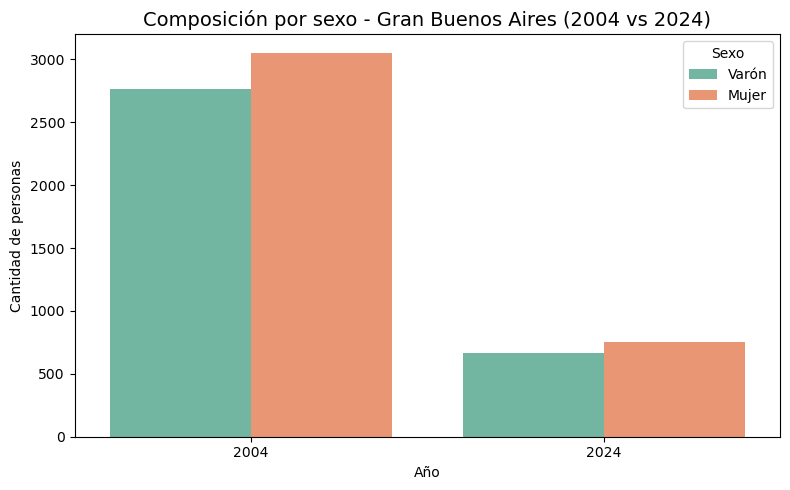

In [243]:
# Filtro correcto de GBA en ambas bases
t2004 = t2004_raw[t2004_raw['aglomerado'] == 'Partidos del GBA'].copy()
t2024 = t2024[t2024['AGLOMERADO'] == 32].copy()

# Crear variable sexo (ajuste en nombre de columna)
t2004['sexo'] = t2004['ch04'].map({'Varón': 'Varón', 'Mujer': 'Mujer'})
t2024['sexo'] = t2024['CH04'].map({1: 'Varón', 2: 'Mujer'})

# Año
t2004['año'] = 2004
t2024['año'] = 2024

# Unificación
personas = pd.concat([t2004[['sexo', 'año']], t2024[['sexo', 'año']]], ignore_index=True)
personas = personas.dropna(subset=['sexo'])

# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=personas, x='año', hue='sexo', palette='Set2')
plt.title('Composición por sexo - Gran Buenos Aires (2004 vs 2024)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


In [213]:
personas.groupby(['año', 'sexo']).size()



año   sexo 
2004  Mujer    3046
      Varón    2765
2024  Mujer     755
      Varón     667
dtype: int64

In [215]:
personas['año'].value_counts()


año
2004    5811
2024    1422
Name: count, dtype: int64

Observación adicional sobre los tamaños muestrales:

Se observa que la cantidad total de personas relevadas en la base correspondiente al año 2024 (1.422 casos) es considerablemente menor en comparación con la base de 2004 (5.811 casos), lo cual se refleja en las alturas de las barras del gráfico. Esta diferencia no se debe a un error en el procesamiento, sino que fue verificada manualmente mediante el uso de value_counts() y groupby() sobre la variable año y la variable sexo.

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables a usar en la matriz de correlación
variables_corr = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Selección de columnas para cada año
corr_2004 = t2004[variables_corr].copy()
corr_2024 = t2024[variables_corr].copy()

# Conversión de CH04 (sexo) a numérico para poder calcular correlación
# (Varón=1, Mujer=2 en 2024; en 2004 originalmente era texto, lo transformamos)
corr_2004['CH04'] = t2004['CH04'].map({'Varón': 1, 'Mujer': 2})
# En 2024 ya viene como 1/2, pero por seguridad nos aseguramos de que esté en formato numérico
corr_2024['CH04'] = pd.to_numeric(t2024['CH04'], errors='coerce')

# Eliminamos filas con valores faltantes para evitar sesgos en la correlación
corr_2004 = corr_2004.dropna()
corr_2024 = corr_2024.dropna()

# Matriz de correlación - 2004
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2004.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Año 2004 (Gran Buenos Aires)')
plt.tight_layout()
plt.show()

# Matriz de correlación - 2024
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2024.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Año 2024 (Gran Buenos Aires)')
plt.tight_layout()
plt.show()


KeyError: "None of [Index(['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC',\n       'IPCF'],\n      dtype='object')] are in the [columns]"

In [219]:
print(t2004.columns.tolist())
print(t2024.columns.tolist())


['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', '

In [263]:
# Variables base (independientemente del caso)
variables_base = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Función para encontrar columnas en DataFrame según nombre
def map_columns(df, var_list):
    cols = df.columns
    return [col for var in var_list for col in cols if col.lower() == var.lower()]

# Obtener columnas compatibles
vars_2004 = map_columns(t2004, variables_base)
vars_2024 = map_columns(t2024, variables_base)

# Filtrar por GBA antes de construir corr_2004
df_gba_2004 = t2004[t2004['aglomerado'] == 'Partidos del GBA']
corr_2004 = df_gba_2004[vars_2004].copy()
corr_2024 = t2024[vars_2024].copy()

# Unificar nombres de columnas en minúscula
corr_2004.columns = [col.lower() for col in corr_2004.columns]
corr_2024.columns = [col.lower() for col in corr_2024.columns]

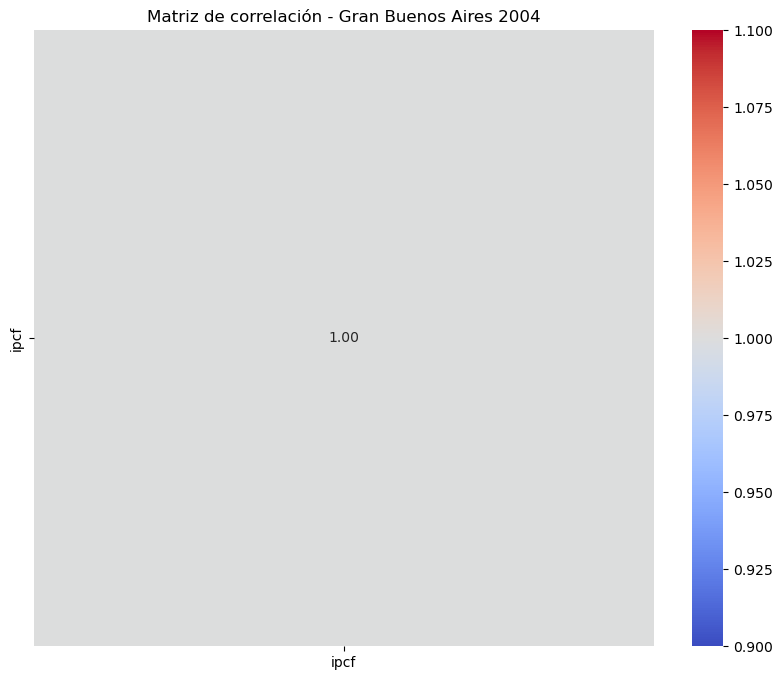

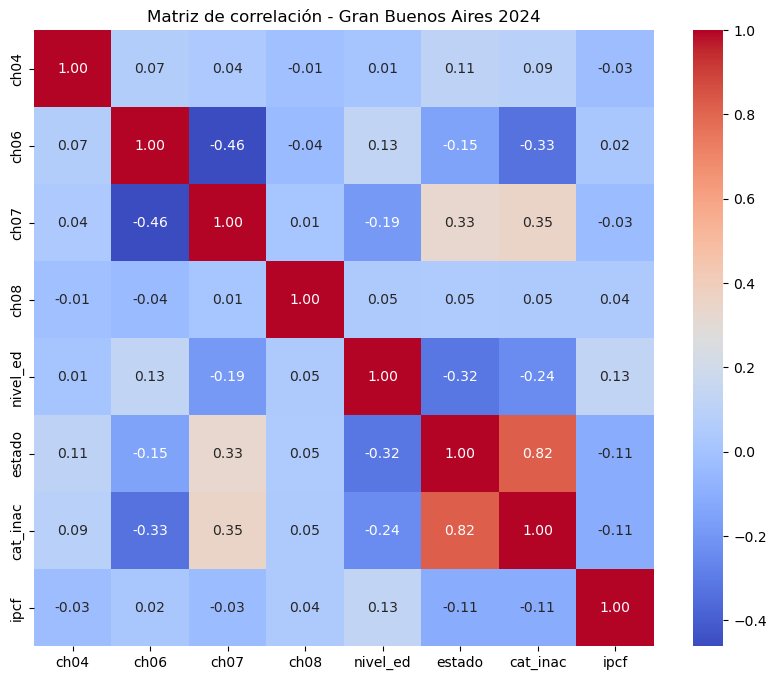

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas numéricas para evitar errores con variables categóricas
numericas_2004 = corr_2004.select_dtypes(include='number')
numericas_2024 = corr_2024.select_dtypes(include='number')

# Función para preparar el DataFrame numérico
def preparar_dataframe_numerico(df, columnas):
    df_corr = df[columnas].copy()
    # Convertir columnas categóricas a códigos numéricos
    for col in df_corr.select_dtypes(include='category').columns:
        df_corr[col] = df_corr[col].cat.codes
    # Eliminar filas con valores faltantes
    df_corr = df_corr.dropna()
    # Devolver solo las columnas numéricas
    return df_corr.select_dtypes(include='number')


# Variables de interés
columnas_interes = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
# Procesamiento 2004
numericas_2004 = preparar_dataframe_numerico(df_gba_2004, columnas_interes)

plt.figure(figsize=(10, 8))
sns.heatmap(numericas_2004.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Gran Buenos Aires 2004")
plt.show()
# Matriz de correlación para 2024
plt.figure(figsize=(10, 8))
sns.heatmap(numericas_2024.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Gran Buenos Aires 2024")
plt.show()


In [269]:
print(corr_2004.dtypes)




ch04        category
ch06        category
ch07        category
ch08        category
nivel_ed    category
estado      category
cat_inac    category
ipcf         float64
dtype: object


In [257]:
print(df_gba_2004.shape)
print(df_gba_2004.columns.tolist())


(0, 178)
['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'p

In [259]:
# Verificamos los valores únicos en la columna 'aglomerado'
print(t2004['aglomerado'].unique())


['Partidos del GBA']
Categories (29, object): ['Gran La Plata' < 'Bahía Blanca - Cerri' < 'Gran Rosario' < 'Gran Santa Fe' ... 'Ciudad de Buenos Aires' < 'Partidos del GBA' < 'Mar del Plata - Batán' < 'Río Cuarto']


In [261]:
# Verificamos si hay valores nulos en la columna
print(t2004['aglomerado'].isnull().sum())


0


In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Conversión de categorías a numérico (solo si tienen codificación válida) ---
for col in corr_2004.columns:
    if corr_2004[col].dtype.name == 'category':
        corr_2004[col] = pd.to_numeric(corr_2004[col].astype(str), errors='coerce')

# --- Eliminación de filas con valores faltantes resultantes de la conversión ---
corr_2004 = corr_2004.dropna()

# --- Filtrar solo variables numéricas ---
numericas_2004 = corr_2004.select_dtypes(include='number')

# --- Matriz de correlación para 2004 ---
plt.figure(figsize=(10, 8))
sns.heatmap(numericas_2004.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Gran Buenos Aires 2004")
plt.show()import seaborn as sns
import matplotlib.pyplot as plt





SyntaxError: invalid syntax (1929816834.py, line 19)

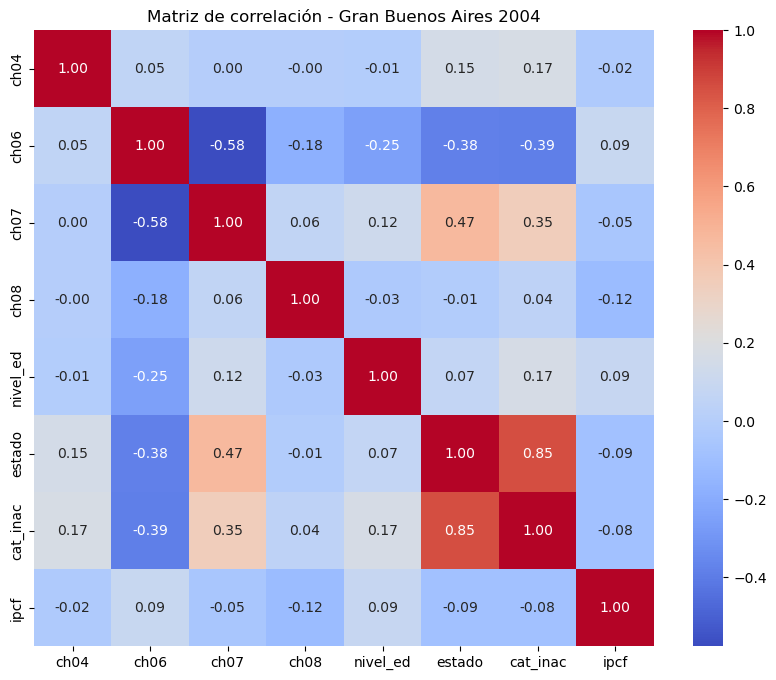

NameError: name 'df_gba_2024' is not defined

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================
# Función para preparar el DataFrame numérico
# =========================================
def preparar_dataframe_numerico(df, columnas):
    df_corr = df[columnas].copy()

    # Convertir columnas categóricas a códigos numéricos
    for col in df_corr.select_dtypes(include='category').columns:
        df_corr[col] = df_corr[col].cat.codes

    # Eliminar filas con valores faltantes
    df_corr = df_corr.dropna()

    # Devolver solo las columnas numéricas
    return df_corr.select_dtypes(include='number')

# =========================================
# Variables de interés
# =========================================
columnas_interes = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# =========================================
# Procesamiento 2004
# =========================================
numericas_2004 = preparar_dataframe_numerico(df_gba_2004, columnas_interes)

plt.figure(figsize=(10, 8))
sns.heatmap(numericas_2004.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Gran Buenos Aires 2004")
plt.show()

# =========================================
# Procesamiento 2024
# =========================================
numericas_2024 = preparar_dataframe_numerico(df_gba_2024, columnas_interes)

plt.figure(figsize=(10, 8))
sns.heatmap(numericas_2024.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Gran Buenos Aires 2024")
plt.show()


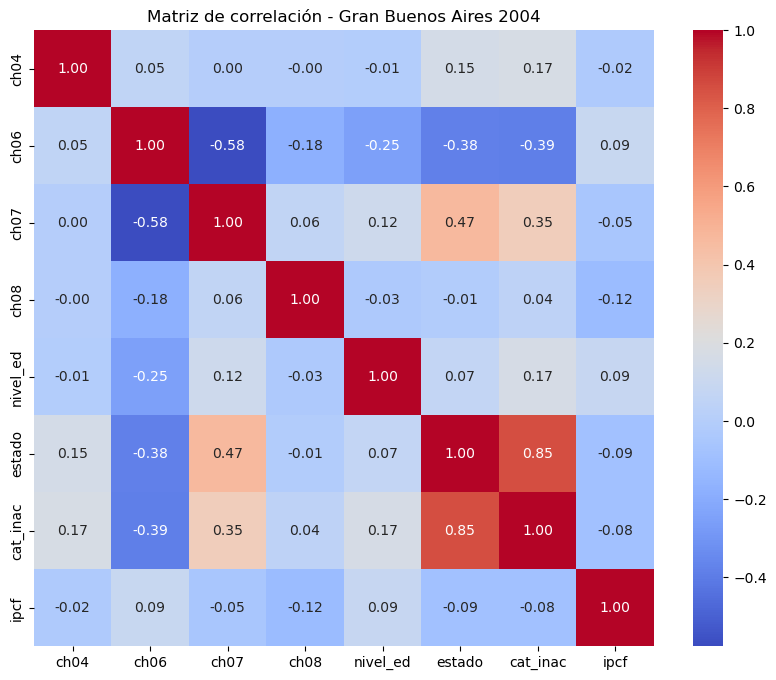

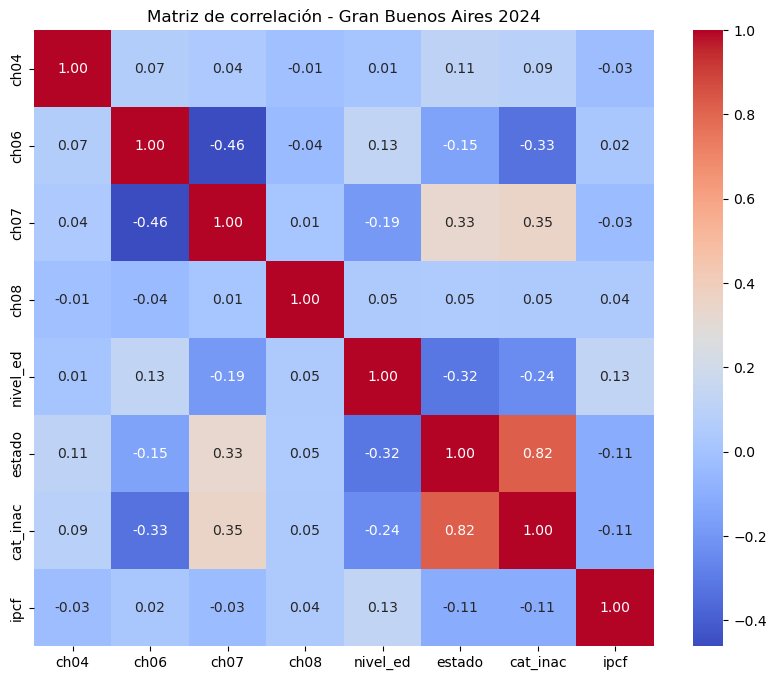

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================
# Función para preparar el DataFrame numérico
# =========================================
def preparar_dataframe_numerico(df, columnas):
    df_corr = df[columnas].copy()

    # Convertir columnas categóricas a códigos numéricos
    for col in df_corr.select_dtypes(include='category').columns:
        df_corr[col] = df_corr[col].cat.codes

    # Eliminar filas con valores faltantes
    df_corr = df_corr.dropna()

    # Devolver solo las columnas numéricas
    return df_corr.select_dtypes(include='number')

# =========================================
# Variables de interés
# =========================================
columnas_interes = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# =========================================
# Procesamiento 2004
# =========================================
numericas_2004 = preparar_dataframe_numerico(df_gba_2004, columnas_interes)

plt.figure(figsize=(10, 8))
sns.heatmap(numericas_2004.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Gran Buenos Aires 2004")
plt.show()



# Matriz de correlación para 2024
plt.figure(figsize=(10, 8))
sns.heatmap(numericas_2024.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Gran Buenos Aires 2024")
plt.show()